In [13]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib.patches as patches

In [14]:
niter = 4097
noise = True
n = 1024  # object size in each dimension
pad = 0 # pad for the reconstructed probe
npos = 16 # total number of positions
z1 = 4.267e-3 # [m] position of the sample
detector_pixelsize = 3.0e-6
energy = 33.35  # [keV] xray energy
wavelength = 1.24e-09/energy  # [m] wave length
focusToDetectorDistance = 1.28  # [m]
z2 = focusToDetectorDistance-z1
distance = (z1*z2)/focusToDetectorDistance
magnification = focusToDetectorDistance/z1
voxelsize = np.abs(detector_pixelsize/magnification)  # object voxel size

extra = 8
nobj = n+n//8
nprb = n+2*pad
npatch = nprb+2*extra

show = True
path = f'/data/vnikitin/paper/near_field'
path_out = f'/data/vnikitin/paper/near_field/rec0'
print(f'{voxelsize=},{distance=}')

voxelsize=np.float64(1.000078125e-08),distance=0.00425277555546875


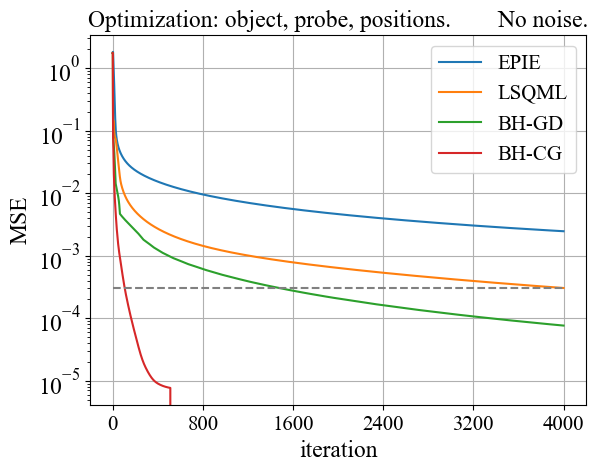

FileNotFoundError: [Errno 2] No such file or directory: 'BH-GD_True_True_True_True'

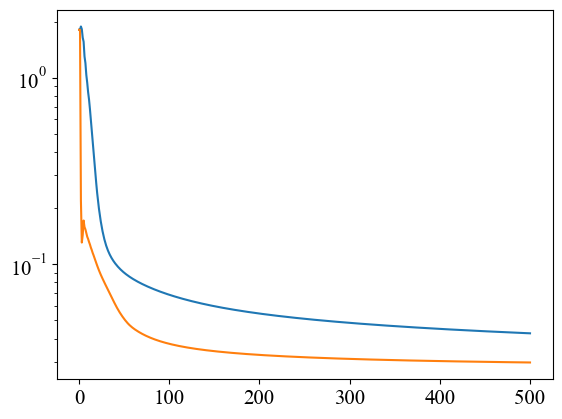

In [27]:
obj_opt = True
prb_opta = [True, True, True, True, False, False ]
pos_opta = [True, True, False, False, False, False]
noisea = [False, True, True, False, True, False]
zooma = [False, False, False, False, True, False ]           
boldea = [False, False, False, False, True, True ]           
nitera = [4001, 501, 501, 4001, 501, 501]        

for jj in range(6):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 15
    fnamea = [  'epie','lsqml','BH-GD','BH-CG']#, 'fifth_rule', 'fifth_rule_cg']#,'fifth_rule_prb05']#, 'cg_fifth_rule','lsqml_2modes','lsqml_positions']
    names = [ 'EPIE','LSQML','BH-GD', 'BH-CG']#,  'GD with step size (Eq.)', 'new CG']


    prb_opt= prb_opta[jj]
    pos_opt = pos_opta[jj]
    noise = noisea[jj]
    zoom = zooma[jj]
    bolde = boldea[jj]
    niter = nitera[jj]

    step = niter//5
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(0, niter, step))


    if zoom:
        ins = ax.inset_axes([0.25,0.63,0.4,0.33])
        ins.tick_params(axis='y',labelsize=17)
    kk=0
    st = 5
    end = 76
    for fname in fnamea:
        fname = f'{fname}_{obj_opt}_{prb_opt}_{pos_opt}_{noise}'
        # print(fname)
        loss = np.zeros(niter)
        with open(fname, 'r') as file:
            csv_reader = csv.reader(file)
            k=0
            for row in csv_reader:
                if k>0:
                    loss[k-1] = float(row[1])*32
                k+=1 
                if k>niter:
                    break       
                
        if fname[:5]=='lsqml':
            sloss=loss[-1]#*1024**2*16*32
        loss[1]=loss[0]
        if fname[0]=='e' and bolde:
            ax.plot(loss,label=names[kk],linewidth=3)
        else:
            ax.plot(loss,label=names[kk])
        kk+=1
        plt.yscale('log')
        
        if zoom:        
            if fname[0]=='e' and bolde:
                ins.plot(np.arange(st,end),loss[st:end],linewidth=3)#*1024**2*16*32)
            else:
                ins.plot(np.arange(st,end),loss[st:end])#*1024**2*16*32)
            ins.set_xticks(np.arange(st, end, 20))
            ins.set_yscale('log')    
            ins.grid('on')

    if zoom:
        ymin,ymax = ins.get_ylim()
        ins.plot((end-st)/2,10**((np.log10(ymax)+np.log10(ymin))/2),'r*',markersize=10,mec='black')    
        plt.plot((end-st)/2,10**((np.log10(ymax)+np.log10(ymin))/2),'r*',markersize=10,mec='black')   
    plt.legend()
    plt.grid('on')
    plt.plot([0,niter],[sloss,sloss],'--',color='0.5')
    plt.xlabel('iteration',fontsize=17)
    plt.ylabel('MSE',fontsize=17)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=15)


    str = 'Optimization: object'
    if prb_opt:
        str+=', probe'
    if pos_opt:
        str+=', positions'    
    str+='.'
    if noise:
        str+= f'       Gaussian noise.'
    else:
        str+= '        No noise.'        
    plt.title(str,fontsize=17)
    plt.savefig(f'Gaussian_{obj_opt}_{prb_opt}_{pos_opt}_{noise}.png',dpi=300,bbox_inches='tight')
    plt.show()


In [4]:
# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.size'] = 15
# fnamea = [  'epie','lsqml','fifth_rule_gd','fifth_rule_cg']#, 'fifth_rule', 'fifth_rule_cg']#,'fifth_rule_prb05']#, 'cg_fifth_rule','lsqml_2modes','lsqml_positions']
# names = [ 'EPIE','LSQML','BH-GD', 'BH-CG']#,  'GD with step size (Eq.)', 'new CG']
# obj_opt = True
# prb_opt = True
# pos_opt = True
# noise = False
# niter = 4001
# if not (prb_opt or pos_opt):
#     niter=501
# step = niter//5
# fig, ax = plt.subplots()
# kk=0
# ax.set_xticks(np.arange(0, niter, step))
# for fname in fnamea:
#     fname = f'{fname}_{obj_opt}_{prb_opt}_{pos_opt}_{noise}'
#     loss = np.zeros(niter)
#     with open(fname, 'r') as file:
#         csv_reader = csv.reader(file)
#         k=0
#         for row in csv_reader:
#             if k>0:
#                 loss[k-1] = float(row[2])
#             k+=1 
#             if k>niter:
#                 break       
#     ax.plot(loss-loss[0],label=names[kk])
#     kk+=1    
# plt.legend()
# plt.grid('on')
# plt.xlabel('iteration',fontsize=17)
# plt.ylabel('Time (sec)',fontsize=17)
# plt.yticks(fontsize=17)
# plt.xticks(fontsize=15)


# str = 'Optimization: object'
# if prb_opt:
#     str+=', probe'
# if pos_opt:
#     str+=', positions'    
# str+='.'
# if noise:
#     str+= f'       Gaussian noise.'
# else:
#     str+= '        No noise.'        
# plt.title(str,fontsize=17)
# plt.savefig(f'time_Gaussian_{obj_opt}_{prb_opt}_{pos_opt}_{noise}.png',dpi=300,bbox_inches='tight')
# plt.show()
# # plt.twinx()
# # plt.xscale('log')


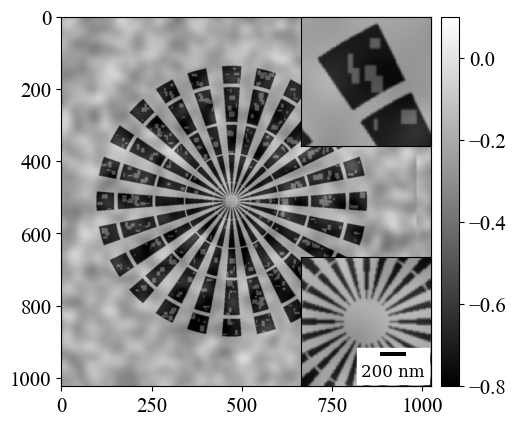

In [5]:

from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable
path = f'/data/vnikitin/paper/near_field'
vvmax=0.1
vvmin=-0.8
psi = np.load(f'{path}/data/psi.npy')
psi = psi[64:-64,64:-64]
nobj = 1024#+1024//8
ni = 100
st1 = nobj//2-ni//2
end1 = nobj//2+ni//2
st2 = 190-ni//2+30
end2 = 190+ni//2+30
st22 = 340-ni//2
end22 = 340+ni//2
fig, ax = plt.subplots()
im = plt.imshow(np.angle(np.roll(psi,-40)),cmap='gray',vmax=vvmax,vmin=vvmin)
fig.colorbar(im, fraction=0.046, pad=0.02)
ins = ax.inset_axes([0.65,0,0.35,0.35])


ins.set_xticks([])
ins.set_yticks([])
ins.imshow(np.angle(psi[st1:end1,st1:end1]),cmap='gray',vmax=vvmax,vmin=vvmin)

ins1 = ax.inset_axes([0.65,0.65,0.35,0.35])
ins1.set_xticks([])
ins1.set_yticks([])
ins1.imshow(np.angle(psi[st2:end2,st22:end22]),cmap='gray',vmax=vvmax,vmin=vvmin)


scalebar = ScaleBar(voxelsize, "m", length_fraction=0.4,height_fraction=0.03,font_properties={
            "family": "serif","size":12,
        },  # For more information, see the cell below
        location="lower right")
ins.add_artist(scalebar)
plt.savefig(f'siemens.png',dpi=300,bbox_inches='tight')
plt.show()



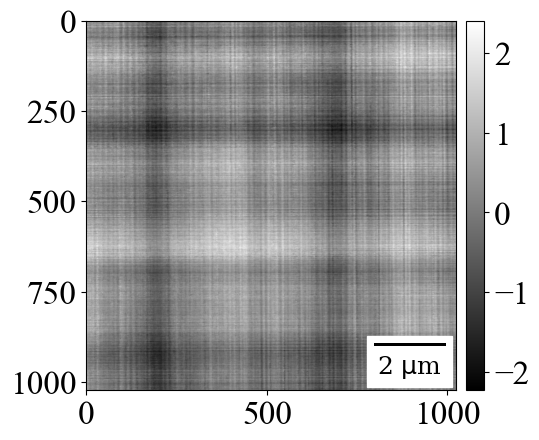

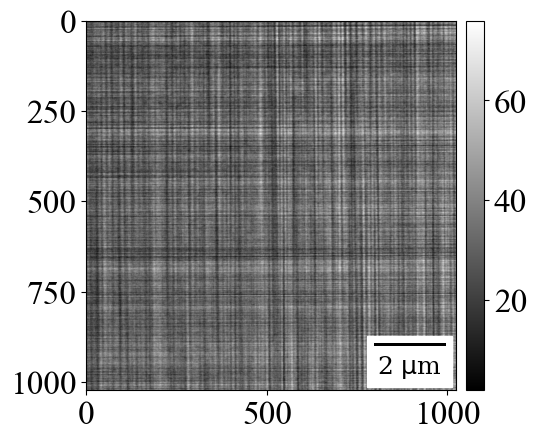

In [6]:
prb = np.load(f'{path}/data/gen_prb.npy')*32
plt.rcParams['font.size'] = 24
fig, ax = plt.subplots()
im = plt.imshow(np.angle(prb),cmap='gray')
fig.colorbar(im, fraction=0.046, pad=0.02)

scalebar = ScaleBar(voxelsize, "m", length_fraction=0.4,height_fraction=0.01,font_properties={
            "family": "serif","size":18,
        },  # For more information, see the cell below
        location="lower right")
ax.add_artist(scalebar)
plt.savefig(f'prb_angle.png',dpi=300,bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
im = plt.imshow(np.abs(prb),cmap='gray')
fig.colorbar(im, fraction=0.046, pad=0.02)

scalebar = ScaleBar(voxelsize, "m", length_fraction=0.4,height_fraction=0.01,font_properties={
            "family": "serif","size":18,
        },  # For more information, see the cell below
        location="lower right")
ax.add_artist(scalebar)
plt.savefig(f'prb_amp.png',dpi=300,bbox_inches='tight')

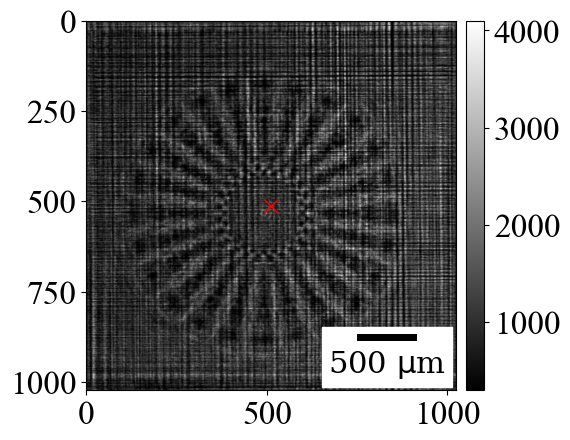

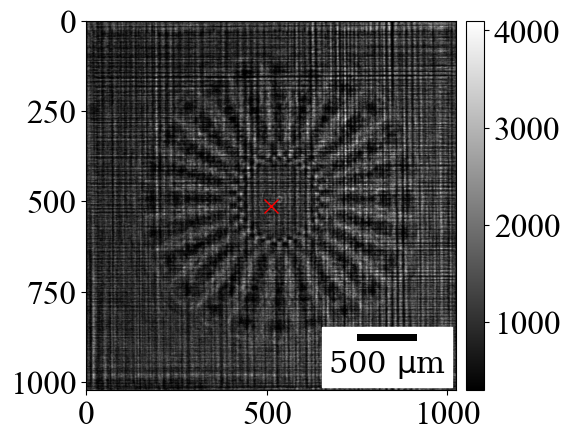

In [7]:
data = np.load(f'{path}/data/data.npy')
plt.rcParams['font.size'] = 24
fig, ax = plt.subplots()

im = plt.imshow(data[0]*1024,cmap='gray',vmax=4100,vmin=300)
fig.colorbar(im, fraction=0.046, pad=0.02)

scalebar = ScaleBar(voxelsize*magnification, "m", length_fraction=0.2,height_fraction=0.02,font_properties={
            "family": "serif","size":22,
        },  # For more information, see the cell below
        location="lower right")
plt.plot(512,512,'rx',markersize=10)
ax.add_artist(scalebar)
plt.savefig(f'data0.png',dpi=300,bbox_inches='tight')

fig, ax = plt.subplots()
im = plt.imshow(data[8]*1024,cmap='gray',vmax=4100,vmin=300)
fig.colorbar(im, fraction=0.046, pad=0.02)

scalebar = ScaleBar(voxelsize*magnification, "m", length_fraction=0.2,height_fraction=0.02,font_properties={
            "family": "serif","size":22,
        },  # For more information, see the cell below
        location="lower right")
plt.plot(512,512,'rx',markersize=10)
ax.add_artist(scalebar)
plt.savefig(f'data1.png',dpi=300,bbox_inches='tight')

In [8]:
shifts = np.load(f'{path}/data/gen_shifts.npy')[:npos]
shifts_random = np.load(f'{path}/data/gen_shifts_random.npy')[:npos]



1.8444248 [ 0.75083876 -0.17331684]
1.8444248 [ 0.75083876 -0.17331684]


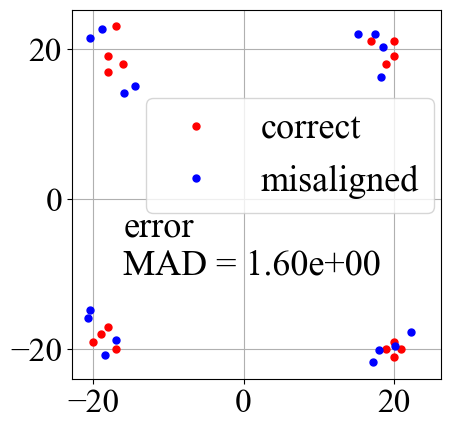

In [9]:
std_dev = np.std(shifts-shifts_random)
x = shifts-shifts_random
# x = shifts-shifts_rec
mad = np.mean(np.absolute(x - np.mean(x,axis=0)))
# mad = np.mean(np.absolute(x - np.mean(x)))
mmean = np.mean(shifts-shifts_random,axis=0)
print(std_dev,mmean)
print(std_dev,mmean)
fig, ax = plt.subplots()
# Set the font size
plt.rcParams['font.size'] = 28
ax.plot(shifts[:,0],shifts[:,1],'.',color='red',label='correct',markersize=10)
ax.plot(shifts_random[:,0],shifts_random[:,1],'.',color='blue',label='misaligned',markersize=10)
ax.text(-16,-5,f'error',fontsize=26)
# ax.text(-16,-10,f'mean = {mmean:.2e}',fontsize=26)
ax.text(-16,-10,f'MAD = {mad:.2e}',fontsize=26)
# ax.text(-16,-15,f'MEAN = ({mmean[0]:.1f}, {mmean[1]:.1f})',fontsize=26)
# ax.text(-16,-15,f'STD = {std_dev:.2e}',fontsize=26)
ax.axis('square')
# ax.set_ylabel('pixels',fontsize=25)
ax.legend(loc=(0.2,0.45),fontsize=26)
ax.grid()
plt.savefig(f'positions.png',dpi=300,bbox_inches='tight')
plt.show()


astropy module not found
olefile module not found


False epie
(16, 2)


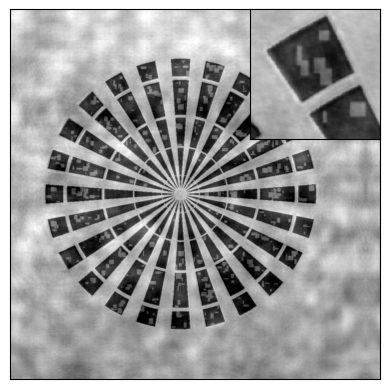

1.8444248 [-0.65485567  0.00741827]


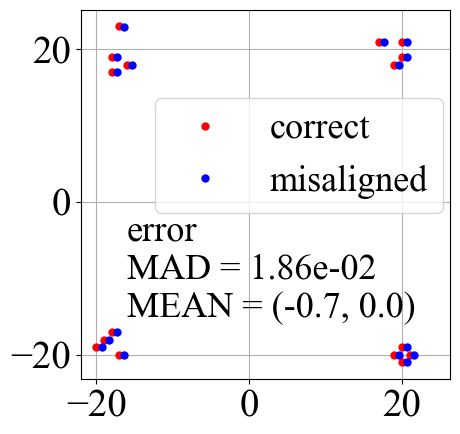

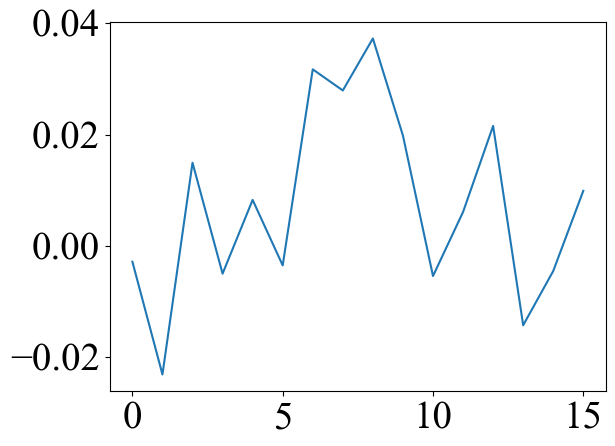

False lsqml
(16, 2)


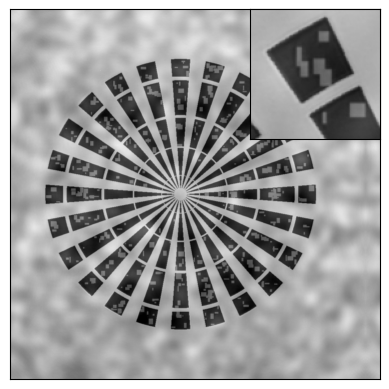

1.8444248 [ 0.08371782 -0.19037187]


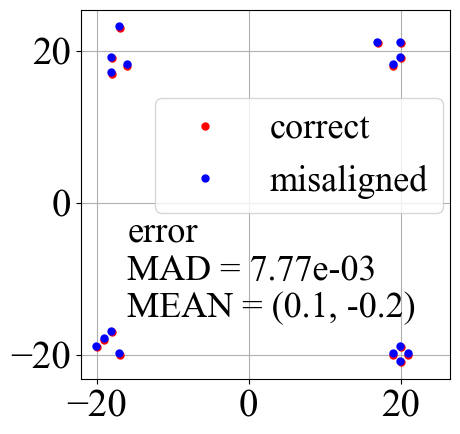

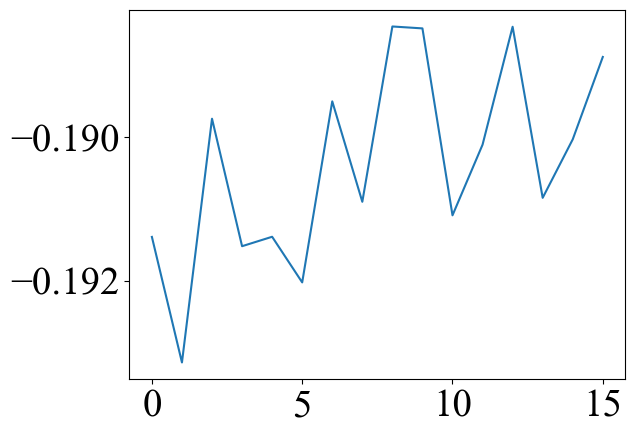

False gd
/data/vnikitin/paper/near_field/rec0_gd_True_True_True_False


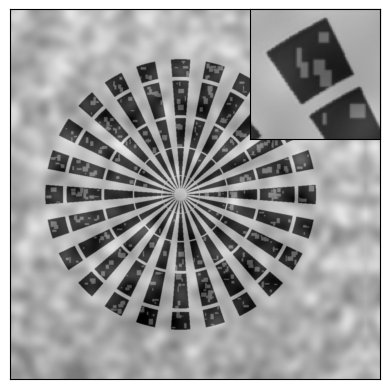

1.8444248 [ 0.79438871 -0.18679163]


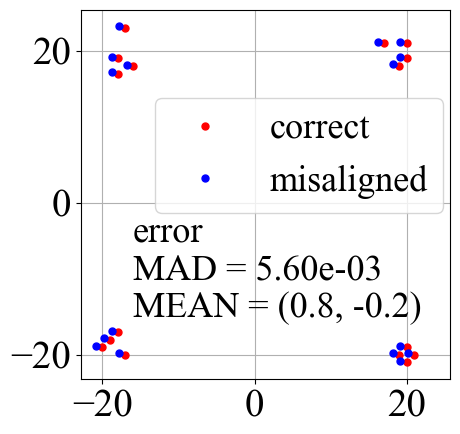

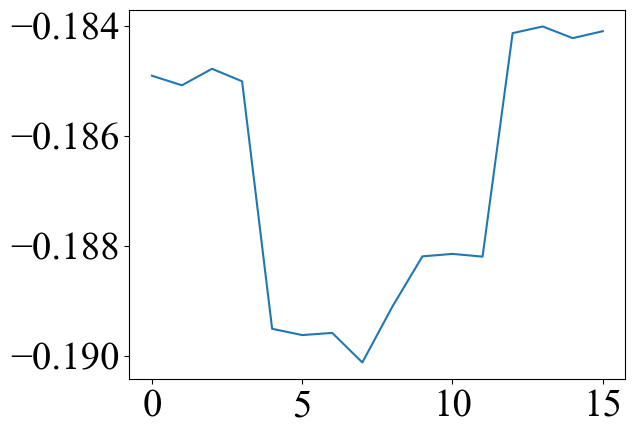

False cg
/data/vnikitin/paper/near_field/rec0_cg_True_True_True_False


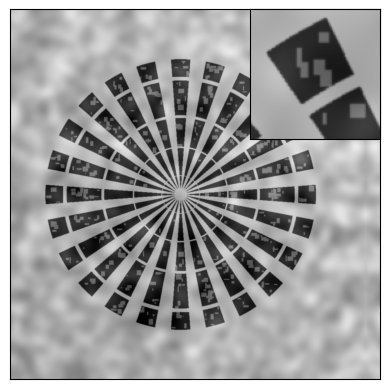

1.8444248 [ 0.84265265 -0.12136082]


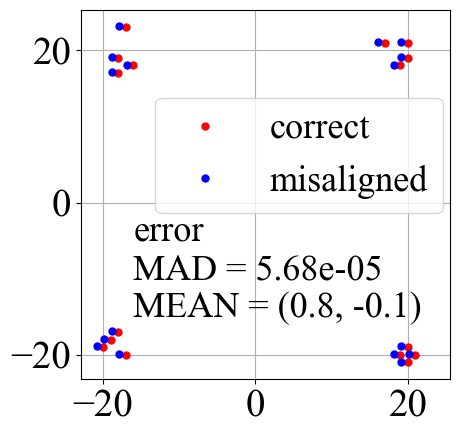

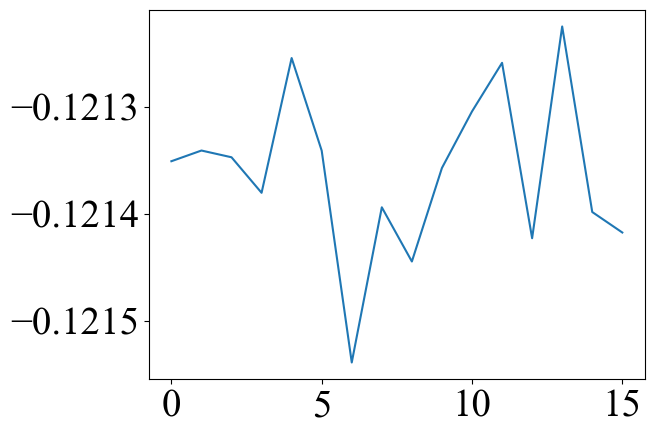

True epie
(16, 2)


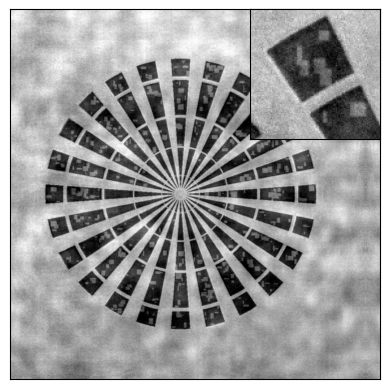

1.8444248 [-0.54525065  0.00264645]


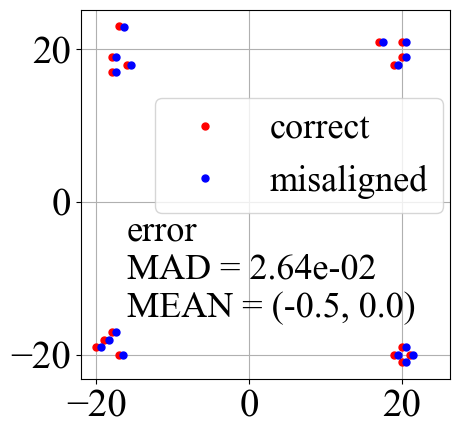

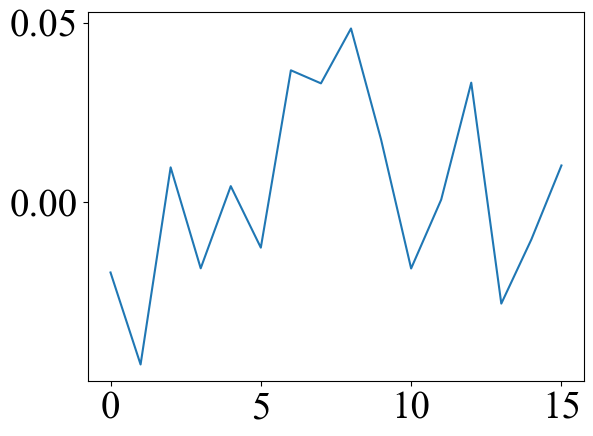

True lsqml
(16, 2)


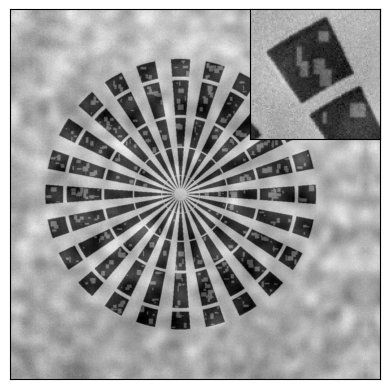

1.8444248 [ 0.09427154 -0.18078518]


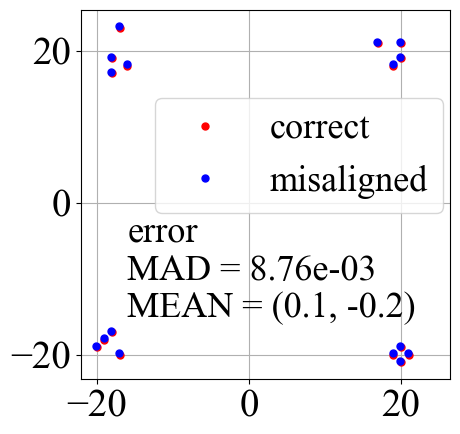

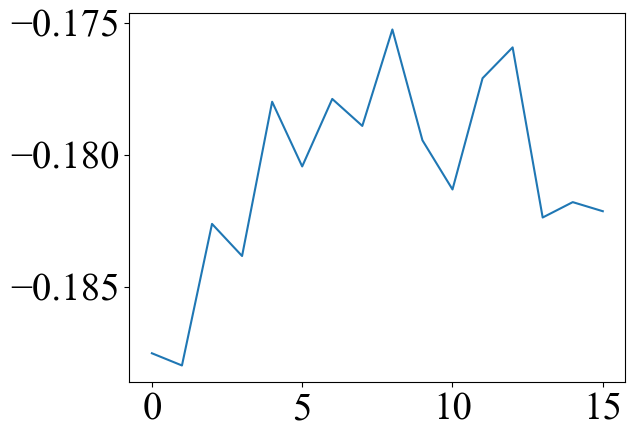

True gd
/data/vnikitin/paper/near_field/rec0_gd_True_True_True_True


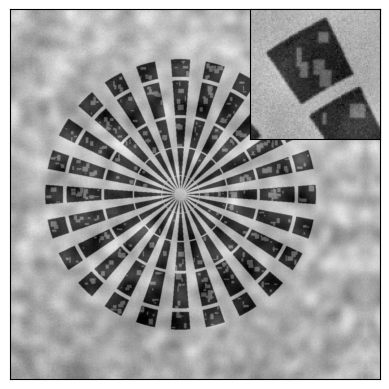

1.8444248 [ 0.65837682 -0.34516066]


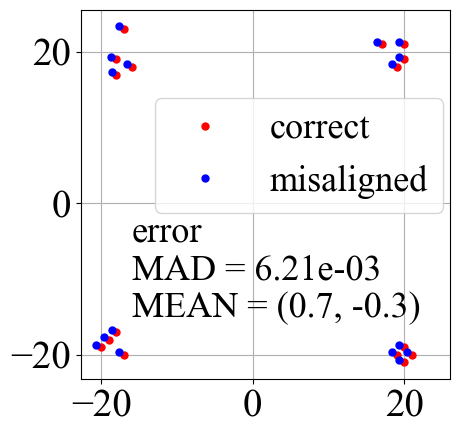

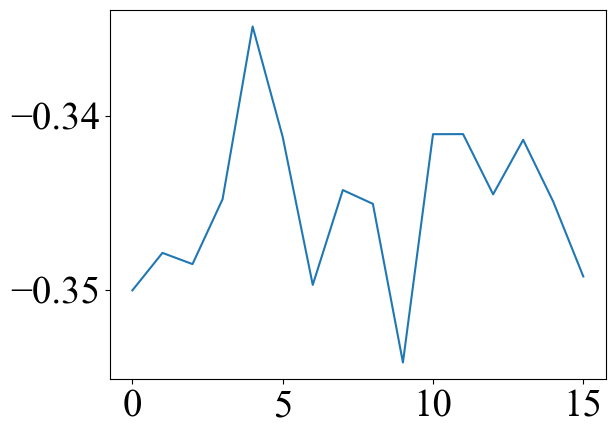

True cg
/data/vnikitin/paper/near_field/rec0_cg_True_True_True_True


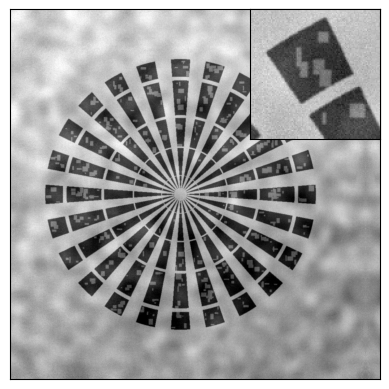

1.8444248 [ 0.56631295 -0.43700229]


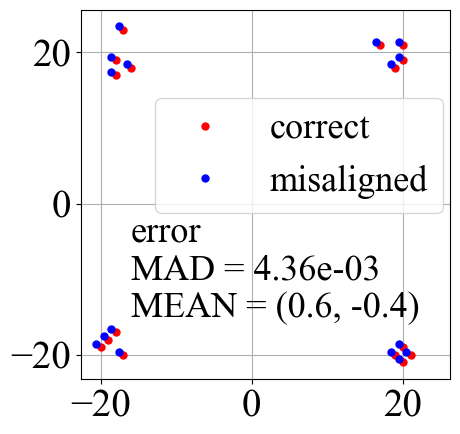

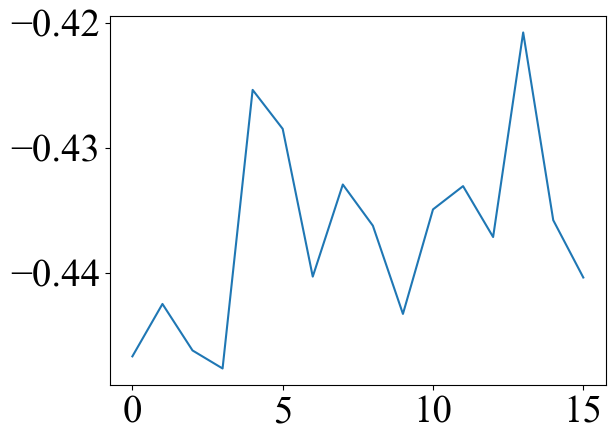

In [10]:
import dxchange
import scipy.ndimage as ndimage
i = 4096
vvmax=0.1
vvmin=-0.8

# prb_opta = [True, True, True, True, False, False ]
# pos_opta = [True, True, False, False, False, False]
# noisea = [True, False, True, False, True, False]
# zooma = [False, False, False, False, True, False ]           
# boldea = [False, False, False, False, True, True ]           
# nitera = [512, 4001, 501, 4001, 501, 501]        

obj_opt=True
prb_opt=True
pos_opt=True
noise=False
for noise in [False,True]:
    for method in ['epie','lsqml','gd','cg']:
        print(noise,method)
        flg = f'{method}_True_{prb_opt}_{pos_opt}_{noise}'
        shifts_random = np.load(f'{path}/data/gen_shifts_random.npy')[:npos]

        if method=='epie' or method=='lsqml':
            psi_angle = dxchange.read_tiff(f'{path_out}_{flg}/crec_psi_angle/0.tiff')[:]
            psi_abs = dxchange.read_tiff(f'{path_out}_{flg}/crec_psi_abs/0.tiff')[:]
            q_angle = dxchange.read_tiff(f'{path_out}_{flg}/crec_prb_angle/0.tiff')[:]
            q_abs = dxchange.read_tiff(f'{path_out}_{flg}/crec_prb_abs/0.tiff')[:]
            if pos_opt:
                shifts_rec = np.load(f'{path_out}_{flg}/crec_shift_0.npy')
            else:    
                shifts_rec = shifts
            print(shifts_rec.shape)
        else:
            print(f'{path_out}_{flg}')
            psi_angle = dxchange.read_tiff(f'{path_out}_{flg}/crec_psi_angle/{i:03}.tiff')[:]
            psi_abs = dxchange.read_tiff(f'{path_out}_{flg}/crec_psi_abs/{i:03}.tiff')[:]
            q_angle = dxchange.read_tiff(f'{path_out}_{flg}/crec_prb_angle/{i:03}.tiff')[:]
            q_abs = dxchange.read_tiff(f'{path_out}_{flg}/crec_prb_abs/{i:03}.tiff')[:]
            shifts = np.load(f'{path}/data/gen_shifts.npy')[:npos]
            if pos_opt:
                ishift = np.round(shifts_random).astype('int32')
            else:
                ishift = np.round(shifts).astype('int32')
            shifts_rec = ishift+np.load(f'{path_out}_{flg}/crec_shift_{i:03}.npy')

        psi = psi_abs*np.exp(1j*(psi_angle)-np.mean(psi_angle[0:128,0:128]))

        psi = psi[64:-64,64:-64]
        nobj = 1024#+1024//8
        ni = 100
        st1 = nobj//2-ni//2
        end1 = nobj//2+ni//2
        st2 = 190-ni//2+30
        end2 = 190+ni//2+30
        st22 = 340-ni//2
        end22 = 340+ni//2

        psi[st1,st1] =vvmin
        psi[st1+1,st1] =vvmax
        psi[st2,st22] =vvmin
        psi[st2,st22] =vvmax

        fig, ax = plt.subplots()
        im = plt.imshow(np.angle(ndimage.shift(psi,(0,-40),mode='reflect')),cmap='gray',vmin=vvmin,vmax=vvmax)
        # fig.colorbar(im, fraction=0.046, pad=0.02)
        # ins = ax.inset_axes([0.65,0,0.35,0.35])

        ax.set_xticks([])
        ax.set_yticks([])

        ins.set_xticks([])
        ins.set_yticks([])

        ins.imshow(np.angle(psi[st1:end1,st1:end1]),cmap='gray',vmax=vvmax,vmin=vvmin)

        ins1 = ax.inset_axes([0.65,0.65,0.35,0.35])
        ins1.set_xticks([])
        ins1.set_yticks([])
        ins1.imshow(np.angle(psi[st2:end2,st22:end22]),cmap='gray',vmax=vvmax,vmin=vvmin)


        scalebar = ScaleBar(voxelsize, "m", length_fraction=0.4,height_fraction=0.03,font_properties={
                    "family": "serif","size":12,
                },  # For more information, see the cell below
                location="lower right")
        ins.add_artist(scalebar)
        plt.savefig(f'siemens_rec_{flg}.png',dpi=300,bbox_inches='tight')
        plt.show()


        # print(np.load(f'{path_out}_{flg}/crec_shift_{i:03}.npy'))
        # fig, ax = plt.subplots()
        # # Set the font size
        # plt.rcParams['font.size'] = 16
        # ax.plot(shifts[:,0],shifts[:,1],'x',color='red',label='correct positions')
        # ax.plot(shifts_rec[:,0],shifts_rec[:,1],'.',color='blue',label='wrong positions')
        # ax.axis('square')
        # ax.set_xlabel('pixels',fontsize=16)
        # ax.legend(fontsize=16)
        # ax.grid()
        # plt.savefig(f'positions_reccg.png',dpi=300,bbox_inches='tight')
        # plt.show()
        # std_dev = np.std(shifts-shifts_rec)
        x = shifts-shifts_rec
        mad = np.mean(np.absolute(x - np.mean(x,axis=0)))
        # mad = np.mean(np.absolute(x - np.mean(x)))
        mmean = np.mean(shifts-shifts_rec,axis=0)
        print(std_dev,mmean)
        fig, ax = plt.subplots()
        # Set the font size
        plt.rcParams['font.size'] = 28
        ax.plot(shifts[:,0],shifts[:,1],'.',color='red',label='correct',markersize=10)
        ax.plot(shifts_rec[:,0],shifts_rec[:,1],'.',color='blue',label='misaligned',markersize=10)
        ax.text(-16,-5,f'error',fontsize=26)
        
        ax.text(-16,-10,f'MAD = {mad:.2e}',fontsize=26)
        ax.text(-16,-15,f'MEAN = ({mmean[0]:.1f}, {mmean[1]:.1f})',fontsize=26)
        ax.axis('square')
        # ax.set_ylabel('pixels',fontsize=25)
        ax.legend(loc=(0.2,0.45),fontsize=26)
        ax.grid()
        plt.savefig(f'positions_rec_{flg}.png',dpi=300,bbox_inches='tight')
        plt.show()
        plt.plot(shifts[:,1]-shifts_rec[:,1])
        plt.show()


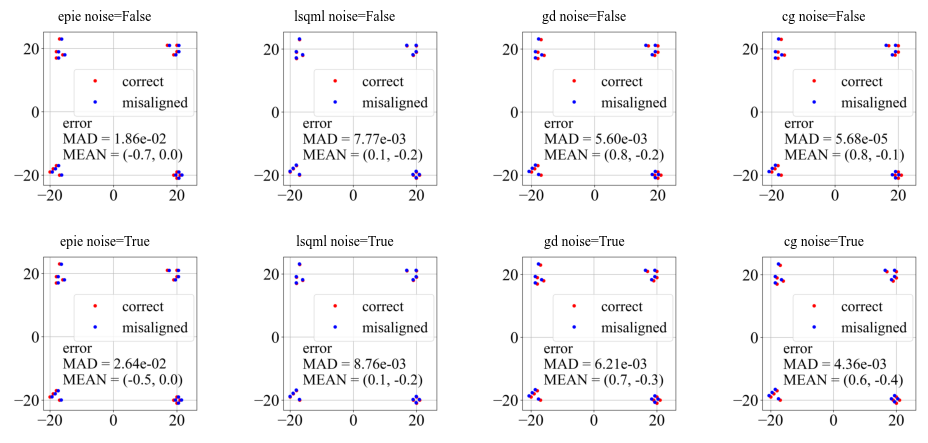

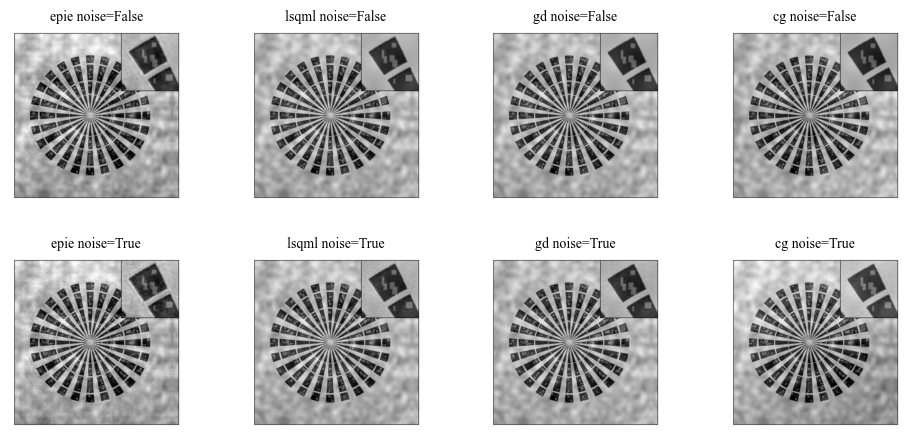

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
obj_opt=True
prb_opt=True
pos_opt=True
# Create figure and axes
fig, axes = plt.subplots(2, 4,figsize=(10, 5))  # 2x2 table
i=0
for noise in [False,True]:
    for method in ['epie','lsqml','gd','cg']:
        flg = f'{method}_True_{prb_opt}_{pos_opt}_{noise}'
        path = f'positions_rec_{flg}.png'        
        img = Image.open(path)
        ax = axes[i // 4, i % 4]  # Calculate row and column
        ax.imshow(img)
        ax.set_title(f'{method} noise={noise}',fontsize=10)
        ax.axis("off")  # Turn off axis labels
        i+=1

plt.tight_layout()
plt.savefig('rec_positions_all.png',dpi=600)
plt.show()


import matplotlib.pyplot as plt
from PIL import Image
obj_opt=True
prb_opt=True
pos_opt=True
# Create figure and axes

fig, axes = plt.subplots(2, 4,figsize=(10, 5))  # 2x2 table
# fig.subplots_adjust(wspace=0, hspace=0)
i=0
for noise in [False,True]:
    for method in ['epie','lsqml','gd','cg']:
        flg = f'{method}_True_{prb_opt}_{pos_opt}_{noise}'
        path = f'siemens_rec_{flg}.png'        
        img = Image.open(path)
        ax = axes[i // 4, i % 4]  # Calculate row and column
        ax.imshow(img)
        ax.set_title(f'{method} noise={noise}',fontsize=10)
        ax.axis("off")  # Turn off axis labels
        i+=1

plt.tight_layout()
plt.savefig('rec_siemens_all.png',dpi=600)
plt.show()


In [12]:
obj_opt=True
prb_opt=True
pos_opt=True
noise=True
method='cg'
flg = f'{method}_True_{prb_opt}_{pos_opt}_{noise}'
q_angle = dxchange.read_tiff(f'{path_out}_{flg}/crec_prb_angle/{i:03}.tiff')[:]
q_abs = dxchange.read_tiff(f'{path_out}_{flg}/crec_prb_abs/{i:03}.tiff')[:]
prb = 32*q_abs*np.exp(1j*q_angle)

plt.rcParams['font.size'] = 24
fig, ax = plt.subplots()
im = plt.imshow(np.angle(prb),cmap='gray')
fig.colorbar(im, fraction=0.046, pad=0.02)

scalebar = ScaleBar(voxelsize, "m", length_fraction=0.4,height_fraction=0.01,font_properties={
            "family": "serif","size":18,
        },  # For more information, see the cell below
        location="lower right")
ax.add_artist(scalebar)
plt.savefig(f'prbrec_angle{flg}.png',dpi=300,bbox_inches='tight')
plt.show()

fig, ax = plt.subplots()
im = plt.imshow(np.abs(prb),cmap='gray')
fig.colorbar(im, fraction=0.046, pad=0.02)

scalebar = ScaleBar(voxelsize, "m", length_fraction=0.4,height_fraction=0.01,font_properties={
            "family": "serif","size":18,
        },  # For more information, see the cell below
        location="lower right")
ax.add_artist(scalebar)
plt.savefig(f'prbrec_amp{flg}.png',dpi=300,bbox_inches='tight')

TypeError: 'bool' object is not subscriptable